<a href="https://colab.research.google.com/github/sourav1199/Face-Mask-Detection/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
from google.colab import drive
drive.mount('/content/gdrive')

In [335]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

In [336]:
import pickle
import time
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Dense,Activation,Flatten, Conv2D, MaxPooling2D


## ***Split the dataset in train and test files.***

In [278]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dataset = []
    for unitData in os.listdir(SOURCE):
        data = SOURCE + unitData
        if(os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file i.e zero size')
    
    train_set_length = int(len(dataset) * SPLIT_SIZE)
    test_set_length = int(len(dataset) - train_set_length)
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = dataset[0:train_set_length]
    test_set = dataset[-test_set_length:]
       
    for unitData in train_set:
        temp_train_set = SOURCE + unitData
        final_train_set = TRAINING + unitData
        copyfile(temp_train_set, final_train_set)
    
    for unitData in test_set:
        temp_test_set = SOURCE + unitData
        final_test_set = TESTING + unitData
        copyfile(temp_test_set, final_test_set)
        
mask = "gdrive/My Drive/Face Mask Detection/dataset/with_mask/"
train_mask_DIR = "gdrive/My Drive/Face Mask Detection/dataset/Training/Train_with_mask/"
test_mask_DIR = "gdrive/My Drive/Face Mask Detection/dataset/Testing/Test_with_mask/"
without_mask = "gdrive/My Drive/Face Mask Detection/dataset/without_mask/"
train_without_mask_DIR = "gdrive/My Drive/Face Mask Detection/dataset/Training/Train_without_mask/"
test_without_mask_DIR = "gdrive/My Drive/Face Mask Detection/dataset/Testing/Test_without_mask/"
split_size = .8
split_data(mask, train_with_mask_DIR, test_with_mask_DIR, split_size)
split_data(without_mask, train_without_mask_DIR, test_without_mask_DIR, split_size)

## **Creating the Model**

In [337]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [338]:
TRAINING_DIR = "gdrive/My Drive/Face Mask Detection/dataset/Training"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=15, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "gdrive/My Drive/Face Mask Detection/dataset/Testing"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=15, 
                                                         target_size=(150, 150))
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

Found 3116 images belonging to 2 classes.
Found 780 images belonging to 2 classes.


In [339]:
history = model.fit_generator(train_generator, epochs=20, validation_data=validation_generator, callbacks=[checkpoint])

Epoch 1/20
 16/208 [=>............................] - ETA: 34s - loss: 1.0358 - acc: 0.5583

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


208/208 [==============================] - 46s 223ms/step - loss: 0.4440 - acc: 0.8148 - val_loss: 0.5010 - val_acc: 0.7397
Epoch 2/20
208/208 [==============================] - 45s 218ms/step - loss: 0.3381 - acc: 0.8594 - val_loss: 0.2096 - val_acc: 0.9282
Epoch 3/20
208/208 [==============================] - 43s 205ms/step - loss: 0.3157 - acc: 0.8736 - val_loss: 0.2137 - val_acc: 0.9256
Epoch 4/20
208/208 [==============================] - 44s 214ms/step - loss: 0.2946 - acc: 0.8809 - val_loss: 0.1974 - val_acc: 0.9321
Epoch 5/20
208/208 [==============================] - 42s 204ms/step - loss: 0.2836 - acc: 0.8909 - val_loss: 0.2313 - val_acc: 0.9192
Epoch 6/20
208/208 [==============================] - 45s 214ms/step - loss: 0.2789 - acc: 0.8922 - val_loss: 0.2122 - val_acc: 0.9218
Epoch 7/20
208/208 [==============================] - 45s 214ms/step - loss: 0.2619 - acc: 0.8983 - val_loss: 0.1685 - val_acc: 0.9436
Epoch 8/20
208/208 [==============================] - 46s 219ms/st

# Model Accuracy and loss

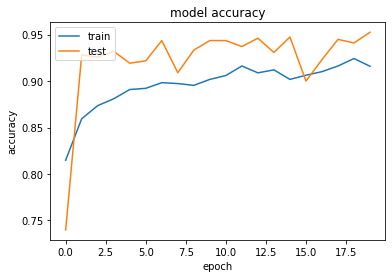

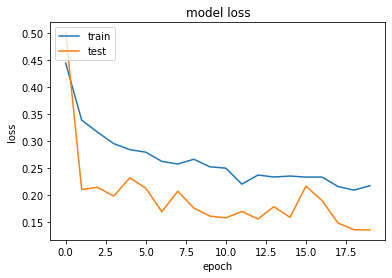

In [340]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test the model

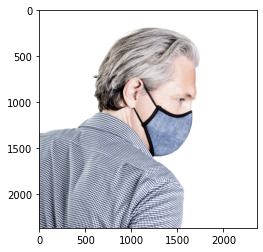

(2365, 2364, 3)


In [364]:
test_path ='gdrive/My Drive/Face Mask Detection/dataset/Testing/Test_with_mask/'
img=cv2.imread(test_path+'with_mask (1775).jpg',cv2.IMREAD_UNCHANGED)
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()
print(im_rgb.shape)

In [ ]:
resized=cv2.resize(img1,(150,150))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,150,150,3))
reshaped = np.vstack([reshaped])
result=model.predict(reshaped)

In [343]:
result

array([[0.88712555, 0.11287437]], dtype=float32)

In [344]:
if result[0][0] > result[0][1]:
  ans = "Wearing Mask"
else:
  ans = "Not wearing Mask"
print(ans)

Wearing Mask


## Save the model

In [345]:
# model.save('gdrive/My Drive/Face Mask Detection/model1.h5')

In [346]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 129600)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

## Using webcam to capture real time image and detect if the person is wearing mask or not.

In [347]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
# model = load_model('gdrive/My Drive/Face Mask Detection/Models/model.h5')

In [356]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
image_file = take_photo()

<IPython.core.display.Javascript object>

In [ ]:
image = cv2.imread(image_file)
image = imutils.resize(image, width=400)

n_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
n_img = imutils.resize(n_img, width=400)
plt.imshow(n_img)
plt.show()
(h, w) = n_img.shape[:2]


resized=cv2.resize(img1,(150,150))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,150,150,3))
reshaped = np.vstack([reshaped])
result=model.predict(reshaped)

In [352]:
print(result)
if result[0][0] > result[0][1]:
  ans = "Wearing Mask"
else:
  ans = "Not wearing Mask"
print(ans)

[[0.88712555 0.11287437]]
Wearing Mask


## Using the pretrained model to detect front face and pass this image to the created model for furter processing

In [ ]:
image = cv2.imread(image_file)
image = imutils.resize(image, width=400)
# cv2_imshow(image)

!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

net.setInput(blob)
detections = net.forward()



for i in range(0, detections.shape[2]):

	confi = detections[0, 0, i, 2]
	if confi > 0.5:
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		text = ans
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(n_img, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(n_img, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
plt.imshow(n_img)
plt.show()
print(ans)